In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

filepath = 'wine+quality/winequality.csv'

Завантаження даних.

Pandas

In [2]:
dfp = pd.read_csv(filepath, sep=',')

dfp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,NaN,34.0,0.9978,3.51,NaN,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,NaN,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


NumPy

In [3]:
types = [("fixed acidity", "float64"), ("volatile acidity", "float64"), ("citric acid", "float64"), 
         ("residual sugar", "float64"), ("chlorides", "float64"), ("free sulfur dioxide", "float64"), 
         ("total sulfur dioxide", "float64"), ("density", "float64"), ("pH", "float64"), 
         ("sulphates", "float64"), ("alcohol", "float64"), ("quality", "int"), ("type", "U5")]

dfn = np.genfromtxt(filepath, delimiter=',', dtype=types, encoding="UTF=8", names=True)

print(dfn.dtype.names)
print(dfn[:5])

('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type')
[( 7.4, 0.7 , 0.  , 1.9, 0.076, nan, 34., 0.9978, 3.51,  nan, 9.4, 5, 'red')
 ( 7.8, 0.88, 0.  , 2.6, 0.098, 25., 67., 0.9968, 3.2 , 0.68, 9.8, 5, 'red')
 ( 7.8, 0.76, 0.04, 2.3, 0.092, nan, 54., 0.997 , 3.26, 0.65, 9.8, 5, 'red')
 (11.2, 0.28, 0.56, 1.9, 0.075, 17., 60., 0.998 , 3.16, 0.58, 9.8, 6, 'red')
 ( 7.4, 0.7 , 0.  , 1.9, 0.076, 11., 34., 0.9978, 3.51, 0.56, 9.4, 5, 'red')]


Поборотися із зниклими даними.

Pandas

In [4]:
# 1 спосіб - це видалення рядків, де присутнє значення nan
dfp_dropped_1 = dfp.dropna()

# 2 спосіб - це зміна nan на наступне (та попереднє) значення в колонці
dfp_dropped_2 = dfp.fillna(method='bfill')
dfp_dropped_2 = dfp_dropped_2.fillna(method='pad')

print(dfp_dropped_1.isnull().sum())
print(dfp_dropped_2.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


C:\Users\someone\AppData\Local\Temp\ipykernel_9436\1932658508.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfp_dropped_2 = dfp.fillna(method='bfill')
C:\Users\someone\AppData\Local\Temp\ipykernel_9436\1932658508.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfp_dropped_2 = dfp_dropped_2.fillna(method='pad')


NumPy

In [18]:
# 1 спосіб - це видалення рядків, де присутнє значення nan
columns = ["chlorides", "free_sulfur_dioxide", "sulphates"]

dfn_dropped_1 = dfn[~np.isnan(dfn["chlorides"])]
dfn_dropped_1 = dfn_dropped_1[~np.isnan(dfn_dropped_1["free_sulfur_dioxide"])]
dfn_dropped_1 = dfn_dropped_1[~np.isnan(dfn_dropped_1['sulphates'])]

for column in columns:
    print(np.sum(np.isnan(dfn_dropped_1[column])))

# 2 спосіб - це зміна nan середнім значенням у стовпці
dfn_dropped_2 = dfn.copy()

for column in columns:
    mean_val = np.nanmean(dfn_dropped_2[column])
    dfn_dropped_2[column] = np.where(np.isnan(dfn_dropped_2[column]), mean_val, dfn_dropped_2[column])

for column in columns:
    print(np.sum(np.isnan(dfn_dropped_2[column])))

0
0
0
0
0
0


Провести нормування або стандартизацію.

Pandas

In [6]:
columns = dfp.select_dtypes(include=['float64']).columns

dfp_norm = dfp.copy()
dfp_norm[columns] = (dfp[columns] - dfp[columns].min()) / (dfp[columns].max() - dfp[columns].min())

dfp_std = dfp.copy()
dfp_std[columns] = (dfp[columns] - dfp[columns].mean()) / dfp[columns].std()

NumPy

In [19]:
columns = [name for name in dfn.dtype.names if dfn[name].dtype.kind in 'f']

dfn_norm = dfn.copy()

for column in columns:
    col = dfn_norm[column] 
    min_val = np.nanmin(col)
    max_val = np.nanmax(col)
    dfn_norm[column] = (col - min_val) / (max_val - min_val)

dfn_std = dfn.copy()

for column in columns:
    col = dfn_std[column]
    mean = np.nanmean(col)
    std = np.nanstd(col)
    dfn_std[column] = (col - mean) / std

Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

Pandas

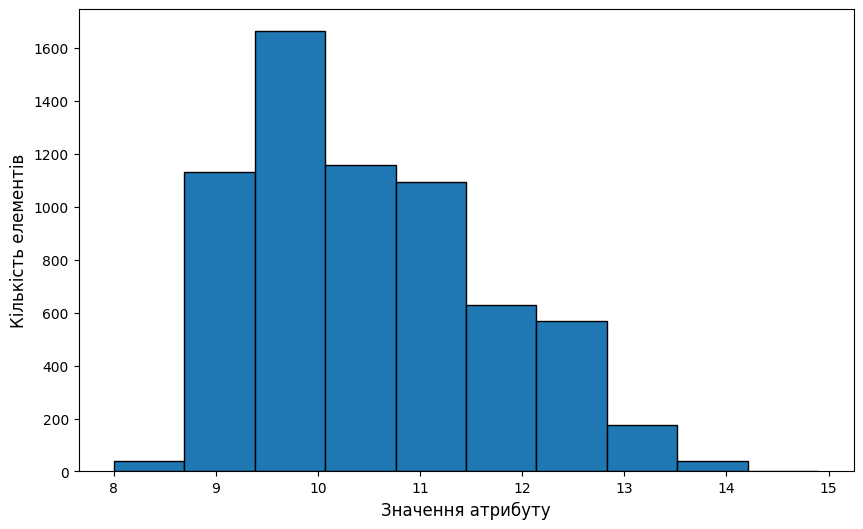

In [27]:
attribute = dfp['alcohol']

plt.figure(figsize=(10, 6))
plt.hist(attribute, bins=10, edgecolor='black')

plt.xlabel('Значення атрибуту', fontsize=12)
plt.ylabel('Кількість елементів', fontsize=12)

plt.show()

NumPy

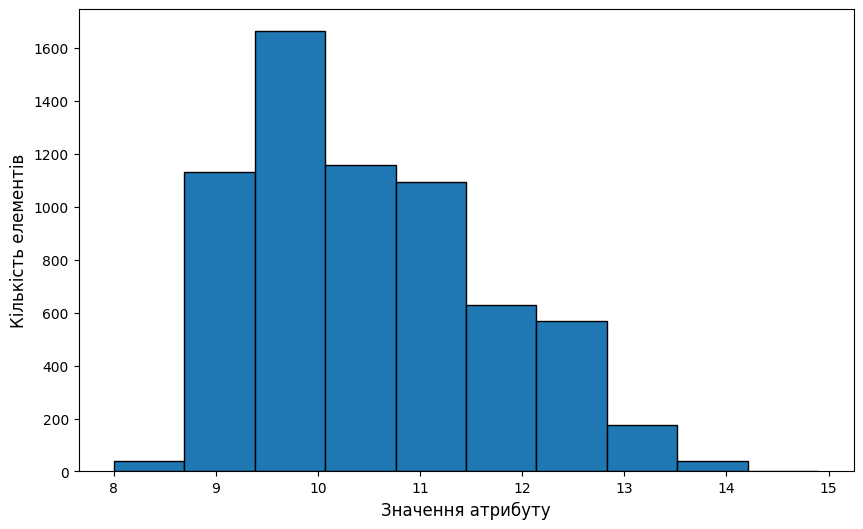

In [25]:
attribute = dfn['alcohol']

plt.figure(figsize=(10, 6))
plt.hist(attribute, bins=10, edgecolor='black')

plt.xlabel('Значення атрибуту', fontsize=12)
plt.ylabel('Кількість елементів', fontsize=12)

plt.show()

Збудувати графік залежності одного integer/real атрибута від іншого.

Pandas

<Axes: xlabel='alcohol', ylabel='quality'>

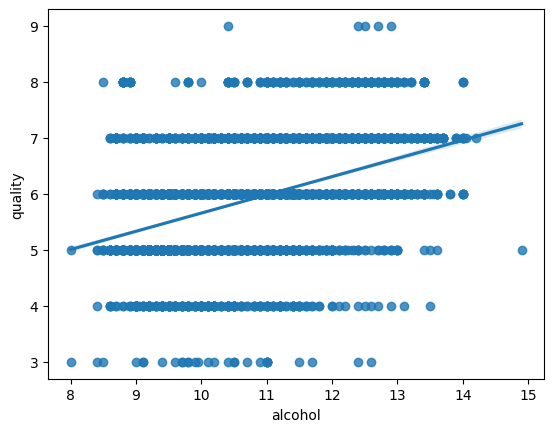

In [8]:
sns.regplot(data=dfp_dropped_2, x="alcohol", y="quality")

NumPy

<Axes: >

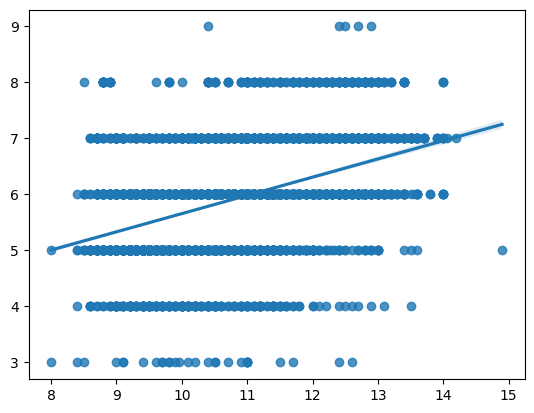

In [9]:
sns.regplot(data=dfn_dropped_2, x="alcohol", y="quality")

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [28]:
x = dfn["alcohol"]
y = dfn["quality"]

pearson_corr, _ = pearsonr(x, y)

spearman_corr, _ = spearmanr(x, y)

print(f"Коефіцієнт Пірсона = {pearson_corr:.3f}")
print(f"Коефіцієнт Спірмена = {spearman_corr:.3f}")

Коефіцієнт Пірсона = 0.444
Коефіцієнт Спірмена = 0.447


Провести One Hot Encoding категоріального string атрибуту.

Pandas

In [11]:
dfp_oneHotEn = dfp_dropped_2.copy() 

type_column = dfp_oneHotEn[["type"]]

encoder = OneHotEncoder(sparse_output=False, dtype=int)
type_encoded = encoder.fit_transform(type_column)
encoded_col_names = encoder.get_feature_names_out(["type"])

df_encoded_type = pd.DataFrame(type_encoded, columns=encoded_col_names)
dfp_oneHotEn = pd.concat([dfp_oneHotEn.drop("type", axis=1), df_encoded_type], axis=1)

dfp_oneHotEn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,25.0,34.0,0.9978,3.51,0.68,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,17.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


NumPy

In [12]:
dfn_oneHotEn = dfn_dropped_2.copy()

type_column = dfn_oneHotEn['type'].reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
type_encoded = encoder.fit_transform(type_column)
encoded_col_names = encoder.get_feature_names_out(['type'])

new_dtype = dfn_oneHotEn.dtype.descr[:-1] + [(name, 'int') for name in encoded_col_names]
new_array = np.empty(dfn_oneHotEn.shape, dtype=new_dtype)

for name in dfn_oneHotEn.dtype.names[:-1]:
    new_array[name] = dfn_oneHotEn[name]

for i, name in enumerate(encoded_col_names):
    new_array[name] = type_encoded[:, i]

print(new_array[:5])

[( 7.4, 0.7 , 0.  , 1.9, 0.076, 30.55507098, 34., 0.9978, 3.51, 0.53163332, 9.4, 5, 1, 0)
 ( 7.8, 0.88, 0.  , 2.6, 0.098, 25.        , 67., 0.9968, 3.2 , 0.68      , 9.8, 5, 1, 0)
 ( 7.8, 0.76, 0.04, 2.3, 0.092, 30.55507098, 54., 0.997 , 3.26, 0.65      , 9.8, 5, 1, 0)
 (11.2, 0.28, 0.56, 1.9, 0.075, 17.        , 60., 0.998 , 3.16, 0.58      , 9.8, 6, 1, 0)
 ( 7.4, 0.7 , 0.  , 1.9, 0.076, 11.        , 34., 0.9978, 3.51, 0.56      , 9.4, 5, 1, 0)]


Провести візуалізацію багатовимірних даних.

Pandas

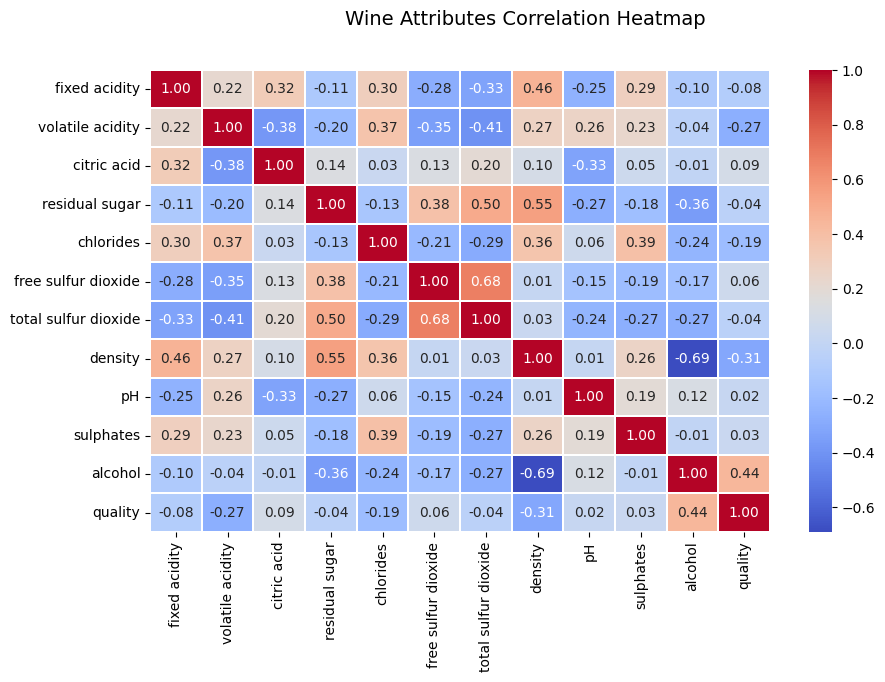

In [13]:
columns = dfp.select_dtypes(include=['float64', 'int64']).columns
df_numeric = dfp_dropped_2[columns]

f, ax = plt.subplots(figsize=(10, 6))
corr = df_numeric.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)

t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

NumPy

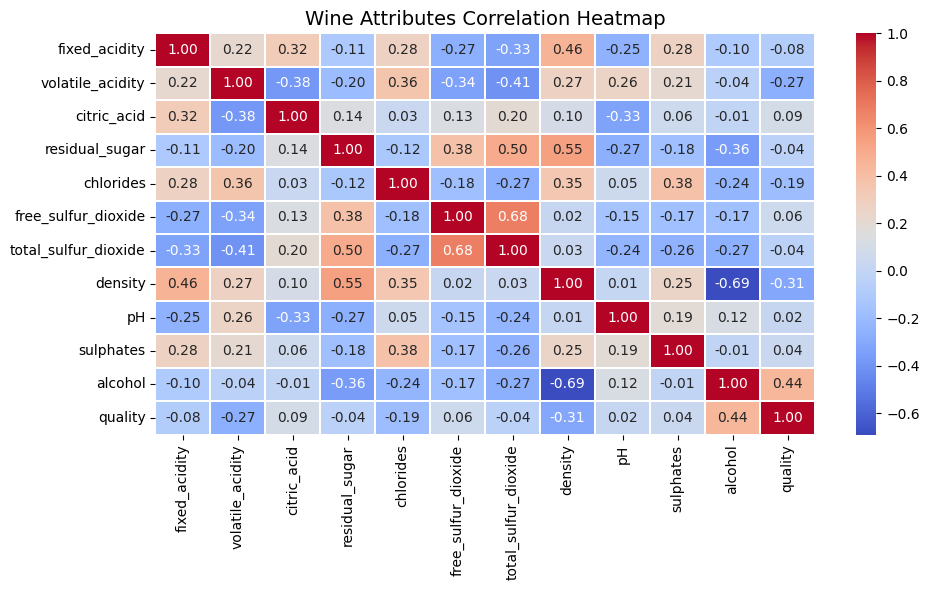

In [17]:
numeric_names = [name for name in dfn.dtype.names if dfn[name].dtype.kind in 'fi']

numeric_data = np.column_stack([dfn_dropped_2[name] for name in numeric_names])

corr_matrix = np.corrcoef(numeric_data, rowvar=False)

plt.figure(figsize=(10, 6))
sns.heatmap(np.round(corr_matrix, 2), annot=True, xticklabels=numeric_names, yticklabels=numeric_names, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Wine Attributes Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()